In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

avocado = pd.read_csv('avocado.csv', index_col='Unnamed: 0', parse_dates=['Date'])

# Show 5 first rows of data
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
# Describe numerical data
avocado.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [4]:
# remove fields and display head
avocado = avocado.drop(['4046','4225', '4770'],axis=1)
avocado.head()

,Date,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Date            0
AveragePrice    0
Total Volume    0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64
conventional    9126
organic         9123
Name: type, dtype: int64


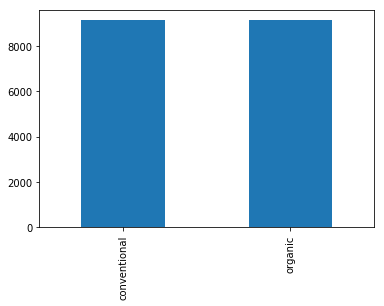

In [5]:
# Counting null values
print(avocado.isnull().sum())

# counting by field 'type'
type_counts = pd.value_counts(avocado['type'])
# print and plot
print(type_counts)
type_counts.plot.bar()

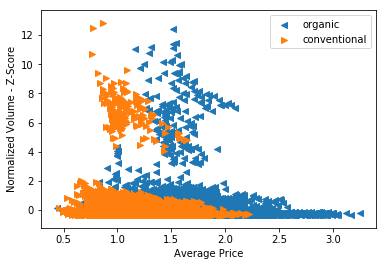

In [28]:
# Create two dataframes and two variables for each the mean and standard deviation
conventional = avocado.loc[avocado['type'] == 'conventional']
cMean = conventional['Total Volume'].mean()
cStd = conventional['Total Volume'].std()

organic = avocado.loc[avocado['type'] == 'organic']
oMean = organic['Total Volume'].mean()
oStd = organic['Total Volume'].std()

# Plot average price and Normalized volume (z-score: x-mean/std)
plt.scatter(organic['AveragePrice'], (organic['Total Volume']-oMean)/oStd,marker = '<', label='organic')
plt.scatter(conventional['AveragePrice'], (conventional['Total Volume']-cMean)/cStd,marker = '>', label='conventional')
# Define labels and display legend
plt.xlabel('Average Price')
plt.ylabel('Normalized Volume - Z-Score')
plt.legend()

In [29]:
# Get the mean of large bags field
print('Large Bags Mean:')
print("{:,.2f}".format(avocado['Large Bags'].mean()))

Large Bags Mean:
54,338.09


In [35]:
# remove more fields and assign it to a new dataframe
bags = avocado.drop(['AveragePrice','Total Volume','year'],axis=1)

# Show averages by type
bagsTable = bags.groupby(['type']).mean()
bagsTable.style.format("{:,.2f}")

,Total Bags,Small Bags,Large Bags,XLarge Bags
type,,,,
conventional,"454,390.13","346,721.80","101,457.70","6,210.64"
organic,"24,817.65","17,613.47","7,202.98",1.20


In [36]:
# Show averages by region and type, highlighting the max for each column
bags = bags.set_index('region').drop(['TotalUS'],axis=0)
bags.groupby(['region', 'type']).mean().style.highlight_max(axis=0).format("{:,.2f}")

In [20]:
# filter records from after 2016 and display average Price and volume
filtered = avocado[avocado['year']>2016].groupby(['type']).mean()
filtered[['AveragePrice','Total Volume']].style.format("{:,.2f}")

,AveragePrice,Total Volume
type,,
conventional,1.26,"1,737,997.68"
organic,1.70,"61,765.16"


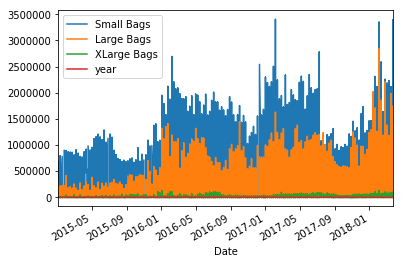

In [11]:
# Recreate year field from date
# bags['year'] = bags['Date'].apply(lambda x: x.year)

#Set Date as the index, drop 'total bags' and plot a time series 
bags = bags.set_index('Date')
bags.drop(['Total Bags'], axis = 1).plot()

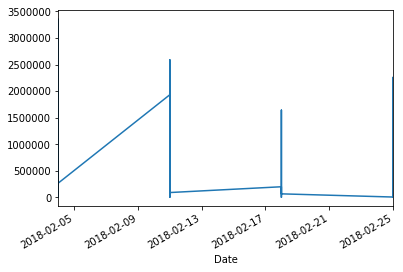

In [15]:
# plot small bags in february only 
bags['2018-02-01':'2018-03-01']['Small Bags'].plot()